# Name: Ahmad Ayman M. Bahaa El-Din
# Semester: Spring 2021
# ID: 17P6053
# Needleman-Wunsch Algorithm For Global Sequence Allignment

In [1]:
#! jupyter-nbconvert --to PDFviaHTML Needleman-Wunsch_Algorithm.ipynb

# Algorithm Tuneable Parameters 

In [2]:
matchReward= 2
mismatchPenalty= -1
gapPenalty= -1

# Helper Functions

In [3]:
def constructEmptyMatrix(cols, rows):
    M = []
    for columnIndex in range(cols):
        M.append([])
    for columnIndex in range(cols):
        for rowIndex in range(rows):
            M[columnIndex].append(None)
    return M

def calculateMaximumScore(isMatched, upScore, leftScore, diagonalScore , matchReward, mismatchPenalty, gapPenalty):
    maxScore = -99
    path = None 
    
    if (isMatched):
        matchingResult = diagonalScore+matchReward 
        if matchingResult>maxScore:
            maxScore = matchingResult
            path = 'match'
    else:
        mismatchingResult = diagonalScore+mismatchPenalty
        if mismatchingResult>maxScore:
            maxScore = mismatchingResult
            path = 'mismatch'
            
    upGapResult = upScore+gapPenalty
    if upGapResult>maxScore:
        maxScore = upGapResult
        path = 'vertical'
    leftGapResult = leftScore+gapPenalty
    if leftGapResult>maxScore:
        maxScore = leftGapResult
        path = 'horizontal'

    return maxScore, path

def extractPath(path):
    extractedPath = []
    currentCell = path[0]['current']
    nextCell = path[0]['previous']
    extractedPath.append(currentCell)
    for index in range(1, len(path)):
        if nextCell == path[index]['current']:
            currentCell = path[index]['current']
            nextCell = path[index]['previous']
            extractedPath.append(currentCell) 
    return extractedPath        

def fillNeedlemanMatrix(M, seq1, seq2,matchReward, mismatchPenalty, gapPenalty):
    solutionPath = []
    for x in range(len(seq1)):
        for y in range(len(seq2)):
#             print("from Sequence 1: ",seq1[x])
#             print("from Sequence 2: ", seq2[y])
            
            isMatched = True if seq1[x]==seq2[y] else False
#             print("Is Matched: ", isMatched)
            
            upScore, leftScore, diagonalScore = -99,-99,-99
            if y-1>=0:
                upScore = M[x][y-1] if M[x][y-1]!= None else -99
            if x-1>=0:
                leftScore = M[x-1][y] if M[x-1][y]!= None else -99
            if x-1>=0 and y-1>=0:
                diagonalScore = M[x-1][y-1] if M[x-1][y-1]!= None else -99
#             print("upScore: ", upScore)
#             print("leftScore: ", leftScore)
#             print("diagonalScore: ", diagonalScore)
                    
            score, path = calculateMaximumScore(isMatched, upScore, leftScore, diagonalScore,
                                                matchReward, mismatchPenalty, gapPenalty)
            if x == 0 and y==0:
                score = 0
#             print(f"Adjusting M[{x}][{y}] to {score}")
#             print(f"Path was: {path}")
#             print("--------------")
            M[x][y] = score
            
            step = {
                'current':[], 
                'previous':[]
            }
            step['current'] =  [x,y]
            # This constructs a step (previous[x,y], current[x,y])
            if path == 'vertical':
                step['previous']= [x,y-1]
            if path == 'horizontal':
                step['previous']= [x-1,y]
            if path == 'match' or path == 'mismatch':
                step['previous']= [x-1,y-1]
            solutionPath.append(step) 
                
    return M, solutionPath

def extractOptimalAllignment(seq1, seq2, optimalSolutionPath):
    optimal_seq1=[]
    optimal_seq2=[]
    
    index_seq1 = optimalSolutionPath[0][0]
    index_seq2 = optimalSolutionPath[0][1]
    
    for index in range(len(optimalSolutionPath)):
        # Stopping condition: The last node is reached, and shall be appended regardless
        if index+1 not in range(len(optimalSolutionPath)):
            break
        currentCell = optimalSolutionPath[index]
        previousCell = optimalSolutionPath[index+1]
        
        # Vertical Gap: Same X-coordinate
        if currentCell[0] == previousCell[0]:
            optimal_seq1.append('_')
            optimal_seq2.append(seq2[index_seq2])
            index_seq2 -=1
        # Horizontal Gap: Same Y-Coordinate
        elif currentCell[1] == previousCell[1]:
            optimal_seq1.append(seq1[index_seq1])
            optimal_seq2.append('_')            
            index_seq1 -=1
        else: 
            optimal_seq1.append(seq1[index_seq1])
            optimal_seq2.append(seq2[index_seq2])
            index_seq1 -=1
            index_seq2 -=1
            
    optimal_seq1.reverse()
    optimal_seq2.reverse()
    return optimal_seq1, optimal_seq2

In [4]:
seq1 = "ACGCTG"
seq2 = "CATGT"

#Sequences to List 
seq1_list = ['j']+(list(seq1))
seq2_list = ['i']+(list(seq2))

Matrix = constructEmptyMatrix(len(seq1_list), len(seq2_list))
resultMatrix, allPossiblePaths = fillNeedlemanMatrix(Matrix, seq1_list, seq2_list, matchReward, mismatchPenalty, gapPenalty)
reversedPossiblePaths = list(reversed(allPossiblePaths))
optimalSolutionPath = extractPath(reversedPossiblePaths)
print("Optimal Allignment Path is: ", optimalSolutionPath)

optimal_seq1, optimal_seq2 = extractOptimalAllignment(seq1_list, seq2_list, optimalSolutionPath)

print("")
print("Optimal Sequence Allignment is: ")
print(optimal_seq1)
print(optimal_seq2)

Optimal Allignment Path is:  [[6, 5], [6, 4], [5, 3], [4, 2], [3, 1], [2, 1], [1, 0], [0, 0]]

Optimal Sequence Allignment is: 
['A', 'C', 'G', 'C', 'T', 'G', '_']
['_', 'C', '_', 'A', 'T', 'G', 'T']


# Graphing 

Sequence 1:  ACGCTG
Sequence 2:  CATGT

Optimal Global Sequence Allignment using Needleman-Wunsch Algorithm: 
A C G C T G _
_ C _ A T G T


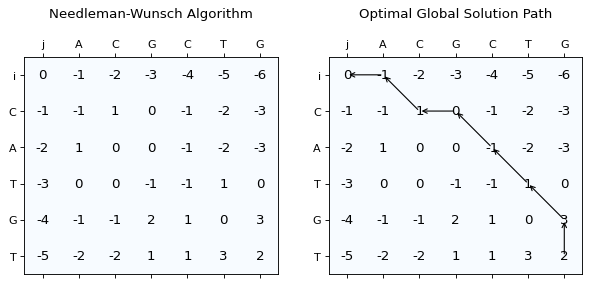

In [5]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(9,9), dpi= 80)

# First Plot: Filled Matrix
plotMatrix = [[0]*len(seq1_list)]*len(seq2_list) 
ax[0].matshow(plotMatrix, cmap='Blues')
ax[0].set_title(f'Needleman-Wunsch Algorithm\n')
ax[0].set_xticks(range(len(seq1_list)))
ax[0].set_yticks(range(len(seq2_list)))
ax[0].set_yticklabels(seq2_list)
ax[0].set_xticklabels(seq1_list)
for i in range(len(seq2_list)):
    for j in range(len(seq1_list)):
        c = resultMatrix[j][i]
        ax[0].text(j, i, str(c), va='center', ha='center', fontsize= 'large')
        
    
# Second Plot: Optimal Path  
ax[1].matshow(plotMatrix, cmap='Blues')
ax[1].set_title(f'Optimal Global Solution Path\n')
ax[1].set_xticks(range(len(seq1_list)))
ax[1].set_yticks(range(len(seq2_list)))
ax[1].set_yticklabels(seq2_list)
ax[1].set_xticklabels(seq1_list)
for i in range(len(seq2_list)):
    for j in range(len(seq1_list)):
        c = resultMatrix[j][i]
        ax[1].text(j, i, str(c), va='center', ha='center', fontsize= 'large')
for index in range(len(optimalSolutionPath)) :
    fromCell = optimalSolutionPath[index]
    toCell = optimalSolutionPath[index+1 if index+1 in range(len(optimalSolutionPath)) else index ]
    fromX, fromY, toX, toY = fromCell[0],fromCell[1], toCell[0], toCell[1] 
    ax[1].annotate("", xy=(toX, toY), xytext=(fromX,fromY),arrowprops=dict(arrowstyle="->"), color='grey')
      
print("Sequence 1: ", seq1)
print("Sequence 2: ", seq2)
print("")
print("Optimal Global Sequence Allignment using Needleman-Wunsch Algorithm: ")
print(*optimal_seq1)
print(*optimal_seq2)